In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5, label = "Model"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    if latents is not None:
        lats_flat = latents.reshape(-1, latents.shape[-1])
        lats_flat = pca.fit_transform(lats_flat)
        lats_pca = lats_flat.reshape(latents.shape[0], latents.shape[1], 3)
        x_star = pca.transform(x_star)
        for i in range(30):
            ax.plot(lats_pca[i,:,0], lats_pca[i,:,1], lats_pca[i,:,2], linewidth=0.5)
    else:
        x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    ax.set_title(f"{label} FPS")
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.savefig(f"fps_{label}.pdf")

In [3]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20241004_NBFF_NoisyGRU_Final/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)
# path_LFADS = pathTT + "20240518_LFADS_Input_Inf_Sweep/"
path_LFADS = pathTT + "20241004_NBFF_InputInf_Replication/"

subfolders_LFADS = [f.path for f in os.scandir(path_LFADS) if f.is_dir()]

comparison = Comparison(comparison_tag = "Input_InfTest_Sweep_Random")
comparison.load_analysis(an_TT, reference_analysis=True)
num_models = len(subfolders_LFADS)
for i, subfolder in enumerate(subfolders_LFADS):
    final_folder = subfolder.split("/")[-1]
    subfolder = subfolder + "/"
    # print(subfolder)
    print(f"Loading {i+1}/{num_models} LFADS models")
    # Find the co_prior + kl_co_scale in the folder name
    co_kl = float(final_folder.split("kl_co_scale=")[1].split("_")[0])
    seed = int(final_folder.split("seed=")[1].split("_")[0])
    analysis_GRU = Analysis_DT.create(run_name = f"LFADS_co_kl_{co_kl}_{seed}", filepath = subfolder, model_type = "LFADS")
    comparison.load_analysis(analysis_GRU, group = f"CO_KL_{co_kl}")#co_kl_{co_kl}")

comparison.regroup()

/home/csverst/Github/CtDBenchmark/
Loading 1/30 LFADS models
Loading 2/30 LFADS models
Loading 3/30 LFADS models
Loading 4/30 LFADS models
Loading 5/30 LFADS models
Loading 6/30 LFADS models
Loading 7/30 LFADS models
Loading 8/30 LFADS models
Loading 9/30 LFADS models
Loading 10/30 LFADS models
Loading 11/30 LFADS models
Loading 12/30 LFADS models
Loading 13/30 LFADS models
Loading 14/30 LFADS models
Loading 15/30 LFADS models
Loading 16/30 LFADS models
Loading 17/30 LFADS models
Loading 18/30 LFADS models
Loading 19/30 LFADS models
Loading 20/30 LFADS models
Loading 21/30 LFADS models
Loading 22/30 LFADS models
Loading 23/30 LFADS models
Loading 24/30 LFADS models
Loading 25/30 LFADS models
Loading 26/30 LFADS models
Loading 27/30 LFADS models
Loading 28/30 LFADS models
Loading 29/30 LFADS models
Loading 30/30 LFADS models


In [4]:
metrics =comparison.compute_metrics(metric_list = ['rate_r2', 'state_r2', 'input_r2','cycle_con', 'co-bps',])


Working on 1 of 31: LFADS_co_kl_0.0_4
Rate R2: 0.891416609287262
State R2: 0.9367489218711853
Input R2: 0.035665564239025116
Linear Cycle Consistency R2: 0.4646126627922058
CO-BPS: 0.12798774242401123

Working on 2 of 31: LFADS_co_kl_0.0_2
Rate R2: 0.8919155597686768
State R2: 0.9384450912475586
Input R2: 0.03514593467116356
Linear Cycle Consistency R2: 0.46651387214660645
CO-BPS: 0.12812533974647522

Working on 3 of 31: LFADS_co_kl_0.0_1
Rate R2: 0.8914299607276917
State R2: 0.938125491142273
Input R2: 0.0355926975607872
Linear Cycle Consistency R2: 0.46687930822372437
CO-BPS: 0.12798327207565308

Working on 4 of 31: LFADS_co_kl_0.0_0
Rate R2: 0.8915412425994873
State R2: 0.9370560646057129
Input R2: 0.03565755486488342
Linear Cycle Consistency R2: 0.4663752317428589
CO-BPS: 0.12800344824790955

Working on 5 of 31: LFADS_co_kl_0.0_3
Rate R2: 0.8918599486351013
State R2: 0.9367198348045349
Input R2: 0.035284433513879776
Linear Cycle Consistency R2: 0.46529388427734375
CO-BPS: 0.128136

In [5]:
run_names = [analysis.run_name for analysis in comparison.analyses if analysis.tt_or_dt == "dt"]

kl_co_scales = [float(run_name.split("co_kl_")[1].split("_")[0]) for run_name in run_names]
print(len(metrics['rate_r2']))
print(kl_co_scales)

30
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]


/tmp/ipykernel_1955740/3401705700.py:24: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(kl_co_scales), metrics['input_r2'])
/tmp/ipykernel_1955740/3401705700.py:29: RuntimeWarning: divide by zero encountered in log10
  ax3.scatter(np.log10(kl_co_scales), metrics['state_r2'])
/tmp/ipykernel_1955740/3401705700.py:39: RuntimeWarning: divide by zero encountered in log10
  ax5.scatter(np.log10(kl_co_scales), metrics['co-bps'])
/tmp/ipykernel_1955740/3401705700.py:44: RuntimeWarning: divide by zero encountered in log10
  ax6.scatter(np.log10(kl_co_scales), metrics['rate_r2'])


Text(0, 0.5, 'Rate R2')

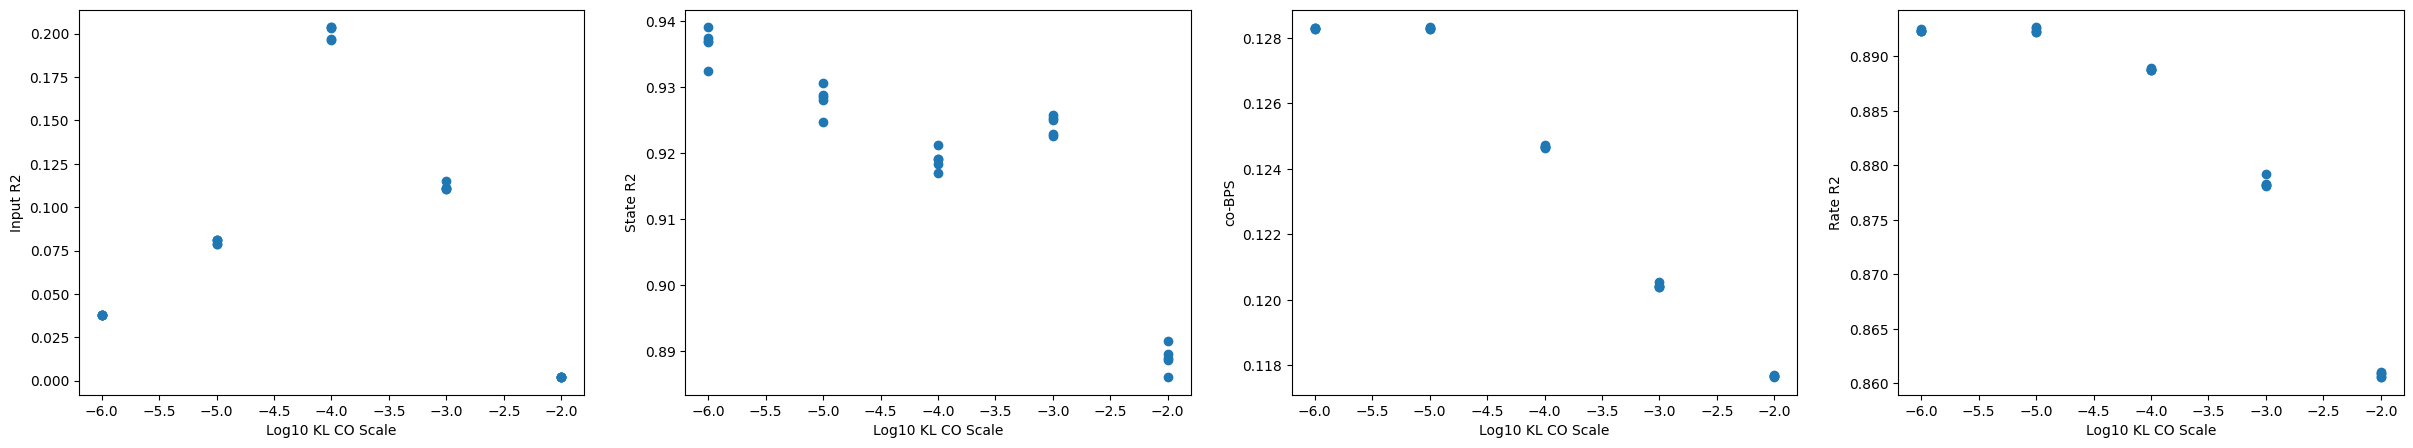

In [6]:
# fig = plt.figure(figsize=(5, 20))
# ax = fig.add_subplot(411)
# ax.scatter(metrics['state_r2'], metrics['cycle_con'])
# ax.set_xlabel('State R2')
# ax.set_ylabel('Cycle Consistency')

# ax2 = fig.add_subplot(412)
# ax2.scatter(metrics['rate_r2'], metrics['bps'])
# ax2.set_xlabel('Rate R2')
# ax2.set_ylabel('BPS')

# ax3 = fig.add_subplot(413)
# ax3.scatter(metrics['input_r2'], metrics['input_emd'])
# ax3.set_xlabel('Input R2')
# ax3.set_ylabel('Input EMD')

# ax4 = fig.add_subplot(414)
# ax4.scatter(metrics['state_r2'], metrics['input_r2'])
# ax4.set_xlabel('State R2')
# ax4.set_ylabel('Input R2')
eps= 1e-12
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(141)
ax.scatter(np.log10(kl_co_scales), metrics['input_r2'])
ax.set_xlabel('Log10 KL CO Scale')
ax.set_ylabel('Input R2')

ax3 = fig.add_subplot(142)
ax3.scatter(np.log10(kl_co_scales), metrics['state_r2'])
ax3.set_xlabel('Log10 KL CO Scale')
ax3.set_ylabel('State R2')

# ax4 = fig.add_subplot(164)
# ax4.scatter(np.log10(kl_co_scales), metrics['cycle_con'])
# ax4.set_xlabel('Log10 KL CO Scale')
# ax4.set_ylabel('Cycle Consistency')

ax5 = fig.add_subplot(143)
ax5.scatter(np.log10(kl_co_scales), metrics['co-bps'])
ax5.set_xlabel('Log10 KL CO Scale')
ax5.set_ylabel('co-BPS')

ax6 = fig.add_subplot(144)
ax6.scatter(np.log10(kl_co_scales), metrics['rate_r2'])
ax6.set_xlabel('Log10 KL CO Scale')
ax6.set_ylabel('Rate R2')







Text(0, 0.5, 'State R2')

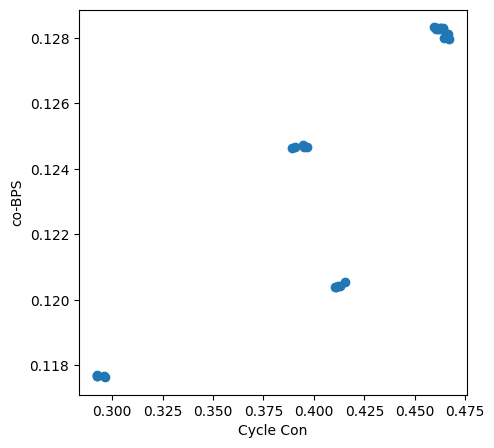

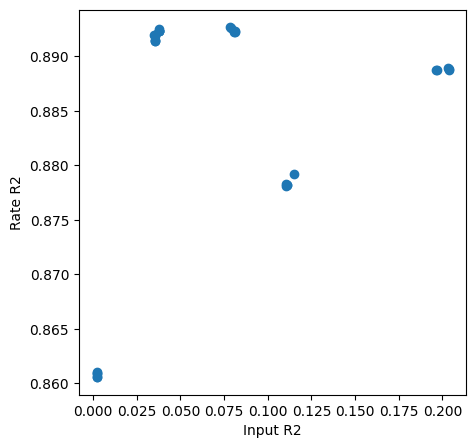

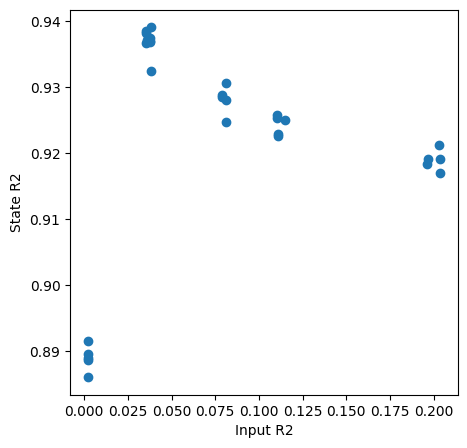

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(metrics['linear_cycle_con'], metrics['co-bps'])
ax.set_xlabel('Cycle Con')
ax.set_ylabel('co-BPS')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(metrics['input_r2'], metrics['rate_r2'])
ax.set_xlabel('Input R2')
ax.set_ylabel('Rate R2')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(metrics['input_r2'], metrics['state_r2'])
ax.set_xlabel('Input R2')
ax.set_ylabel('State R2')





/tmp/ipykernel_1955740/455357567.py:5: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  group_indices = [np.where(groups == group)[0] for group in unique_groups]
/tmp/ipykernel_1955740/455357567.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=colors1[np.where(unique_groups == legend_group)[0][0]], label=legend_group)


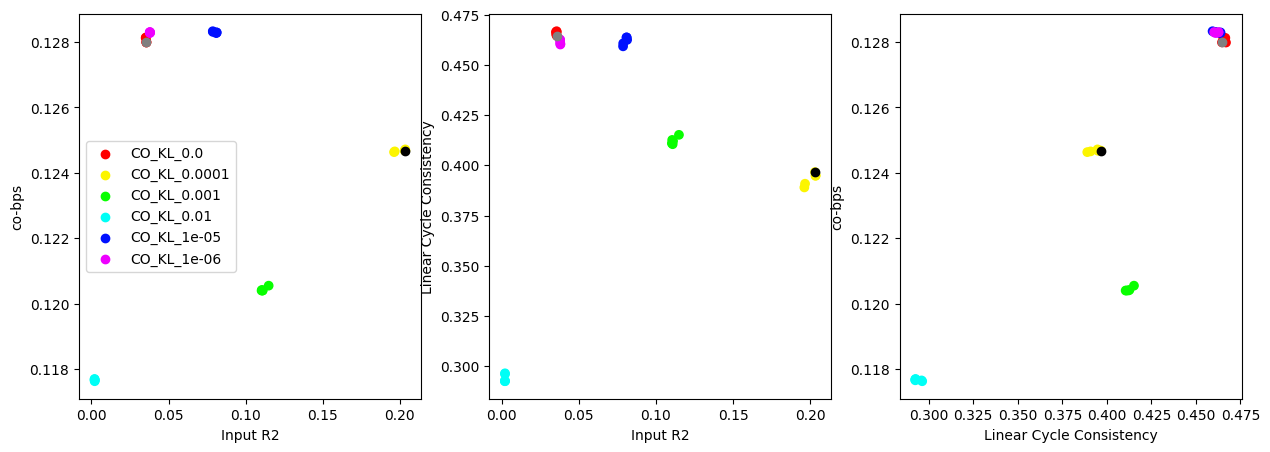

In [44]:
groups = metrics['group']
best_model_ind = 5
bad_model_ind = 0
unique_groups = np.unique(groups)
group_indices = [np.where(groups == group)[0] for group in unique_groups]
colors1 = plt.cm.hsv(np.linspace(0, 1, len(unique_groups)+1))
colors_list = []
for i, group in enumerate(groups):
    colors_list.append(colors1[np.where(unique_groups == group)[0][0]])
    
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
ax.scatter(metrics['input_r2'], metrics['co-bps'], c = colors_list)
ax.scatter(metrics['input_r2'][best_model_ind], metrics['co-bps'][best_model_ind], c = 'k')
ax.scatter(metrics['input_r2'][bad_model_ind], metrics['co-bps'][bad_model_ind], c = 'grey')
ax.set_xlabel("Input R2")
ax.set_ylabel("co-bps")
for legend_group in unique_groups:
    ax.scatter([], [], c=colors1[np.where(unique_groups == legend_group)[0][0]], label=legend_group)
ax.legend()
# Save as pdf

ax = fig.add_subplot(132)
ax.scatter(metrics['input_r2'], metrics['linear_cycle_con'], c = colors_list)
ax.scatter(metrics['input_r2'][best_model_ind], metrics['linear_cycle_con'][best_model_ind], c = 'k')
ax.scatter(metrics['input_r2'][bad_model_ind], metrics['linear_cycle_con'][bad_model_ind], c = 'grey')
ax.set_xlabel("Input R2")
ax.set_ylabel("Linear Cycle Consistency")
# Save as pdf

ax = fig.add_subplot(133)
ax.scatter(metrics['linear_cycle_con'], metrics['co-bps'], c = colors_list)
ax.scatter(metrics['linear_cycle_con'][best_model_ind], metrics['co-bps'][best_model_ind], c = 'k')
ax.scatter(metrics['linear_cycle_con'][bad_model_ind], metrics['co-bps'][bad_model_ind], c = 'grey')
ax.set_xlabel("Linear Cycle Consistency")
ax.set_ylabel("co-bps")
# Save as pdf
plt.savefig("input_inf_metrics.pdf")


In [9]:
best_inp = np.argmax(metrics['input_r2'])
bad_inp = np.argmax(metrics['co-bps'])
print(f"Best input model: {run_names[best_inp]}")
print(f"Worst input model: {run_names[bad_inp]}")

analysis_best_inp = [analysis for analysis in comparison.analyses if analysis.run_name == run_names[best_inp]][0]
analysis_bad_inp = [analysis for analysis in comparison.analyses if analysis.run_name == run_names[bad_inp]][0]


Best input model: LFADS_co_kl_0.0001_3
Worst input model: LFADS_co_kl_1e-05_1


In [17]:

# analysis_best_inp.model.to("cpu")
inputs_best = analysis_best_inp.get_inferred_inputs(phase = "val")
inputs_bad = analysis_bad_inp.get_inferred_inputs(phase = "val")
# best_fps = analysis_best_inp.plot_fps(inputs = inputs_best, q_thresh = 1e-5)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

In [40]:
print(metrics['input_r2'])
print(metrics['co-bps'])

[0.035665564239025116, 0.03514593467116356, 0.0355926975607872, 0.03565755486488342, 0.035284433513879776, 0.20314106345176697, 0.196274533867836, 0.20353266596794128, 0.20363111793994904, 0.19671986997127533, 0.11034274846315384, 0.11085642129182816, 0.11109790951013565, 0.11493640393018723, 0.11055631935596466, 0.002015716629102826, 0.0021028469782322645, 0.0020377987530082464, 0.0020992315839976072, 0.0021238275803625584, 0.08088880032300949, 0.0810663253068924, 0.08130551874637604, 0.0786929726600647, 0.07878157496452332, 0.038040950894355774, 0.03782979026436806, 0.03799360245466232, 0.0378887914121151, 0.037790510803461075]
[0.12798774242401123, 0.12812533974647522, 0.12798327207565308, 0.12800344824790955, 0.1281360536813736, 0.12468072772026062, 0.12463511526584625, 0.12471816688776016, 0.12467600405216217, 0.12465708702802658, 0.12040528655052185, 0.12040579319000244, 0.12040835618972778, 0.12055489420890808, 0.1204238086938858, 0.11770425736904144, 0.11763514578342438, 0.1176

In [38]:
from ctd.comparison.fixedpoints import find_fixed_points
best_model_ind = 5
device = torch.device('cpu')
best_analysis =comparison.analyses[best_model_ind]
rates_best, lats_best = best_analysis.get_model_outputs(phase = "val")
inputs_best = best_analysis.get_inferred_inputs(phase = "val")
inputs_best_mean = torch.mean(inputs_best, dim = 0).mean(dim = 0).detach().cpu().numpy()
model_best = best_analysis.model.to(device)
lats_best = lats_best.detach().cpu().numpy()
fps_best = find_fixed_points(
    model = model_best, 
    state_trajs = lats_best, 
    inputs = inputs_best_mean,
    device = device,
    seed = seed,
    )

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
_,latents = analysis_best_inp.get_model_outputs(phase = "val")
latents = latents.detach().cpu().numpy()
plot_model_fps(best_fps, latents = latents, label = "Best Inputs", q_thresh=1e-3)

NameError: name 'analysis_best_inp' is not defined

In [ ]:
worst_inputs = analysis_worst_inp.get_inferred_inputs(phase='val')
mean_inf_inputs_worst = worst_inputs.mean(axis = 0)
mean_inf_inputs_worst = mean_inf_inputs_worst.mean(axis = 0)
print(mean_inf_inputs_worst)

worst_fps = analysis_worst_inp.plot_fps(inputs = torch.tensor(mean_inf_inputs_worst).to(analysis_worst_inp.model.device), q_thresh = 1e-5)

In [ ]:
latents_worst = analysis_worst_inp.get_model_outputs(phase = "val")[1].detach().cpu().numpy()
plot_model_fps(worst_fps, latents = latents_worst, label = "Worst Inputs", q_thresh=1e-4)

In [ ]:
true_inputs = an_TT.get_true_inputs(phase= 'val').detach().cpu().numpy()
out_dict = an_TT.get_model_outputs(phase = 'val')
controlled = out_dict['controlled'].detach().numpy()

worst_inputs = analysis_worst_inp.get_inferred_inputs(phase='val').detach().cpu().numpy()
best_inputs = analysis_best_inp.get_inferred_inputs(phase ='val').detach().cpu().numpy()


n_trials, n_time, n_inputs = true_inputs.shape
n_inputs_inf = best_inputs.shape[-1]

flat_true_inputs = true_inputs.reshape(-1, true_inputs.shape[-1])
flat_inf_inputs_best = best_inputs.reshape(-1, best_inputs.shape[-1])
flat_inf_inputs_worst = worst_inputs.reshape(-1, worst_inputs.shape[-1])

reg = LinearRegression().fit(flat_inf_inputs_best, flat_true_inputs)
r2 = reg.score(flat_inf_inputs_best, flat_true_inputs)
rot_inf_inputs_best = reg.predict(flat_inf_inputs_best)
rot_inf_inputs_best = rot_inf_inputs_best.reshape(true_inputs.shape)

reg_worst = LinearRegression().fit(flat_inf_inputs_worst, flat_true_inputs)
r2_worst = reg_worst.score(flat_inf_inputs_worst, flat_true_inputs)
rot_inf_inputs_worst = reg_worst.predict(flat_inf_inputs_worst)
rot_inf_inputs_worst = rot_inf_inputs_worst.reshape(true_inputs.shape)



In [ ]:
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(411)
ax.plot(controlled[0], label = "Controlled")
# ax.set_ylabel("True State")
ax.set_xticklabels([])

ax.set_yticklabels([])
ax = fig.add_subplot(412)
ax.plot(true_inputs[0], label = "True Inputs")
# ax.set_ylabel("True Inputs")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax = fig.add_subplot(413)
ax.plot(rot_inf_inputs_best[0], label = "Inferred Inputs Best")
# ax.set_ylabel("Inf Inputs (Best)")
ax.set_xticklabels([])

ax.set_yticklabels([])
ax = fig.add_subplot(414)
ax.plot(rot_inf_inputs_worst[0], label = "Inferred Inputs Worst")
# ax.set_ylabel("Inf Inputs (Worst)")
# ax.set_xlabel("Time (bins)")

ax.set_xticklabels([])

ax.set_yticklabels([])
plt.savefig("input_comparison.pdf")



In [ ]:
def effective_inputs(inputs):
    B, T, N = inputs.shape
    states = np.zeros((B, N), dtype=int)
    effective = np.zeros_like(inputs, dtype=int)
    
    for t in range(T):
        for b in range(B):
            for n in range(N):
                input_val = inputs[b, t, n]
                current_state = states[b, n]
                if input_val == 1:
                    if current_state == 0:
                        effective[b, t, n] = 1
                        states[b, n] = 1
                elif input_val == -1:
                    if current_state == 1:
                        effective[b, t, n] = -1
                        states[b, n] = 0
                        
    return effective

def ineffective_inputs(inputs):
    B, T, N = inputs.shape
    states = np.zeros((B, N), dtype=int)
    ineffective = np.zeros_like(inputs, dtype=int)
    
    for t in range(T):
        for b in range(B):
            for n in range(N):
                input_val = inputs[b, t, n]
                current_state = states[b, n]
                if input_val == 1:
                    if current_state == 1:
                        ineffective[b, t, n] = 1
                elif input_val == -1:
                    if current_state == 0:
                        ineffective[b, t, n] = -1
                # Update state regardless of effectiveness
                if input_val == 1 and current_state == 0:
                    states[b, n] = 1
                elif input_val == -1 and current_state == 1:
                    states[b, n] = 0
    
    return ineffective

states_flat = controlled.reshape(-1, controlled.shape[-1])
# Set states_flat to zero if less than 0.1
states_flat = np.where(states_flat < 0.1, 0, states_flat)
# Set states_flat to 1 if greater than 0.1
states_flat = np.where(states_flat >= 0.1, 1, states_flat)
states = states_flat.reshape(controlled.shape)
effective_inputs_mat = effective_inputs(true_inputs)
ineffective_inputs_mat = ineffective_inputs(true_inputs)

            
trial_num =1    
fig = plt.figure(figsize = [5,8])
ax = fig.add_subplot(611)
ax.plot(controlled[trial_num], label = "Controlled")
ax.set_xticklabels([])

ax.set_title("True State")
# ax.set_xticklabels([])
# ax.set_yticklabels([])

ax = fig.add_subplot(612)
ax.plot(true_inputs[trial_num], label = "True Inputs")
ax.set_title("True Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(613)
ax.plot(effective_inputs_mat[trial_num], label = "Effective Inputs")
ax.set_title("Effective Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(614)
ax.plot(ineffective_inputs_mat[trial_num], label = "Ineffective Inputs")
ax.set_title("Ineffective Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])


ax = fig.add_subplot(615)
ax.plot(rot_inf_inputs_best[trial_num], label = "Inferred Inputs Best")
ax.set_ylabel("Inf Inputs (Best)")
# ax.set_xlabel("Time (bins)")
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(616)
ax.plot(rot_inf_inputs_worst[trial_num], label = "Inferred Inputs Worst")
ax.set_ylabel("Inf Inputs (Worst)")
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig("eff_input_comparison.pdf")


effective_inputs_flat = effective_inputs_mat.reshape(-1, effective_inputs_mat.shape[-1])
true_inputs_flat = true_inputs.reshape(-1, true_inputs.shape[-1])

In [ ]:

def compute_psth(inputs, signal, window=10):
    """
    Computes PSTH for a second signal based on when the inputs are +1 and -1.
    
    Args:
    inputs (np.ndarray): A BxTxN tensor of inputs.
    signal (np.ndarray): A BxTxN tensor of the second signal.
    window (int): The number of time steps before and after the event to consider.
    
    Returns:
    tuple: PSTHs for +1 inputs and -1 inputs for each dimension.
    """
    B, T, N = inputs.shape
    
    psth_plus = [[] for _ in range(N)]
    psth_minus = [[] for _ in range(N)]
    
    for b in range(B):
        for t in range(T):
            for n in range(N):
                if inputs[b, t, n] == 1:
                    if t >= window and t < T - window:
                        psth_plus[n].append(signal[b, t-window:t+window+1, n])
                elif inputs[b, t, n] == -1:
                    if t >= window and t < T - window:
                        psth_minus[n].append(signal[b, t-window:t+window+1, n])
    
    # Compute the average PSTH for +1 and -1 inputs for each dimension
    psth_plus = [np.mean(psth, axis=0) if psth else np.zeros((2*window + 1,)) for psth in psth_plus]
    psth_minus = [np.mean(psth, axis=0) if psth else np.zeros((2*window + 1,)) for psth in psth_minus]
    
    return psth_plus, psth_minus

In [ ]:
psth_plus_eff, psth_minus_eff = compute_psth(effective_inputs_mat, rot_inf_inputs_best)
psth_plus_ineff, psth_minus_ineff = compute_psth(ineffective_inputs_mat, rot_inf_inputs_best)

In [ ]:
print(effective_inputs_mat.shape)
timeVec = np.arange(-10, 11)
fig = plt.figure(figsize = [10,10])
ax1 = fig.add_subplot(321)
ax1.plot(timeVec, psth_plus_eff[0], label = "+ Inputs")
ax1.plot(timeVec, psth_minus_eff[0], label = "- Inputs")
ax1.set_xticklabels([])
ax1.set_title('Effective_inputs')
ax1.set_ylabel("Bit 1")
ax1.set_ylim(-0.6, 0.6)
ax1.legend()

ax2 = fig.add_subplot(322)
ax2.plot(timeVec, psth_plus_ineff[0])
ax2.plot(timeVec, psth_minus_ineff[0])
ax2.set_title('Ineffective_inputs')

ax2.set_ylim(-0.06, 0.06)
ax2.set_xticklabels([])

ax3 = fig.add_subplot(323)
ax3.plot(timeVec, psth_plus_eff[1])
ax3.plot(timeVec, psth_minus_eff[1])
ax3.set_xticklabels([])

ax3.set_ylim(-0.6, 0.6)
ax3.set_ylabel("Bit 2")

ax4 = fig.add_subplot(324)
ax4.plot(timeVec, psth_plus_ineff[1])
ax4.plot(timeVec, psth_minus_ineff[1])
ax4.set_xticklabels([])

ax4.set_ylim(-0.06, 0.06)

ax5 = fig.add_subplot(325)
ax5.plot(timeVec, psth_plus_eff[2])
ax5.plot(timeVec, psth_minus_eff[2])
ax5.set_ylabel("Bit 3")

ax5.set_ylim(-0.6, 0.6)


ax6 = fig.add_subplot(326)
ax6.plot(timeVec, psth_plus_ineff[2])
ax6.plot(timeVec, psth_minus_ineff[2])

ax6.set_ylim(-0.06, 0.06)


In [ ]:
# Smooth the effective inputs
def smooth_rows(arr, window_size=1):
    kernel = np.ones(window_size) / window_size
    smoothed_arr = np.array([np.convolve(row, kernel, mode='same') for row in arr])
    return smoothed_arr

s_eff_inputs = smooth_rows(effective_inputs_flat.T).T
s_inf_inputs = smooth_rows(flat_inf_inputs_best.T).T

reg = LinearRegression().fit(s_inf_inputs, s_eff_inputs)
r2_effective = reg.score(s_inf_inputs, s_eff_inputs)
s_inf_inputs_rot = reg.predict(s_inf_inputs)
rot_inf_inputs_best_effective = s_inf_inputs_rot.reshape(true_inputs.shape)
print(r2_effective)

s_effective_inputs = s_eff_inputs.reshape(true_inputs.shape)


fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(411)
ax.plot(states[trial_num], label = "Controlled")
# ax.set_ylabel("True State")
# ax.set_xticklabels([])
# ax.set_yticklabels([])
ax = fig.add_subplot(412)
ax.plot(true_inputs[trial_num], label = "True Inputs")
# ax.set_ylabel("True Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax = fig.add_subplot(413)
ax.plot(s_effective_inputs[trial_num], label = "Effective Inputs")
# ax.set_ylabel("True Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax = fig.add_subplot(414)
ax.plot(rot_inf_inputs_best_effective[trial_num], label = "Inferred Inputs Best")



In [ ]:
from ctd.comparison.fixedpoints import find_fixed_points
worst_controller = analysis_worst_inp.model.decoder.rnn.cell.con_cell
state_trajs = 5*np.random.randn(1024, 30, 128)
state_trajs = torch.tensor(state_trajs).float()
fps = find_fixed_points(
    model = worst_controller,
    state_trajs= state_trajs,
    inputs= torch.zeros((1024, 30, 276)),
    n_inits=1024,
    noise_scale=0.0,
    learning_rate=1e-2,
    max_iters=10000,
    device="cpu",
    seed=0,
    compute_jacobians=True,
)

In [ ]:
xstar = fps.xstar
qstar = fps.qstar
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.hist(qstar, bins=50)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x_star = xstar
q_star = fps.qstar
q_flag = q_star < 0.03
stability= fps.is_stable
x_star = x_star[q_flag]
q_star = q_star[q_flag]
pca = PCA(n_components=3)
x_star = pca.fit_transform(x_star)
stability = stability[q_flag]

stable_X = x_star[stability]
unstable_X = x_star[~stability]
ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
ax.set_title("Worst Inputs Controller FPS")
ax.legend()


In [ ]:
rate_state_inputs2 = [row for i, row in enumerate(rate_state_inputs) if i != ref_ind]
rate_state_inputs2 = np.array(rate_state_inputs2)
good_ind = np.argmax(rate_state_inputs2[:,3])
bad_ind = 19
print(analyses[good_ind].run_name)
print(analyses[bad_ind].run_name)
figState_input = plt.figure(figsize=(10,10))
ax = figState_input.add_subplot(111)
ax.scatter(rate_state_inputs2[:,2], rate_state_inputs2[:,1], color = 'k')
ax.scatter(rate_state_inputs2[good_ind,2], rate_state_inputs2[good_ind,1], color = 'g')
ax.scatter(rate_state_inputs2[bad_ind,2], rate_state_inputs2[bad_ind,1], color = 'r')
ax.set_xlabel("Input R2")
ax.set_ylabel("State R2")

ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
plt.savefig("state_input.pdf")

figRate_input = plt.figure(figsize = (10,10))
axRate = figRate_input.add_subplot(111)
axRate.scatter(rate_state_inputs2[:,2], rate_state_inputs2[:,0], color = 'k')
axRate.scatter(rate_state_inputs2[good_ind,2], rate_state_inputs2[good_ind,0], color = 'g')
axRate.scatter(rate_state_inputs2[bad_ind,2], rate_state_inputs2[bad_ind,0], color = 'r')
axRate.set_xlabel("Input R2")
axRate.set_ylabel("Rate R2")

axRate.set_xlim([-0.05, 1.05])
axRate.set_ylim([-0.05, 1.05])
plt.savefig("rate_input.pdf")

fig3D = plt.figure(figsize = (10,10))
ax3D = fig3D.add_subplot(111, projection='3d')
ax3D.scatter(rate_state_inputs2[:,0], rate_state_inputs2[:,1], rate_state_inputs2[:,2], color = 'k')
ax3D.scatter(rate_state_inputs2[good_ind,0], rate_state_inputs2[good_ind,1], rate_state_inputs2[good_ind,2], color = 'g')
ax3D.scatter(rate_state_inputs2[bad_ind,0], rate_state_inputs2[bad_ind,1], rate_state_inputs2[bad_ind,2], color = 'r')
ax3D.set_xlabel("Rate R2")
ax3D.set_ylabel("State R2")
ax3D.set_zlabel("Inputs R2")
ax3D.set_xlim([0.15, 1.05])
ax3D.set_ylim([0.15, 1.05])
ax3D.set_zlim([0.0, 0.25])
plt.savefig("3d.pdf")

In [ ]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_DTNODE_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.regroup()

#comparison_single.plot_trials_reference(num_trials =2, num_pcs=4)
# comparison_single.plot_trials_reference_dims(num_trials=2, dims = [0,1,2,3])


In [ ]:
comparison_single.compare_dynamics_DSA(
    phase = "all",
    n_delays = 30,
    rank = 100
    )

In [ ]:

def visualize_stateR2(comp, num_trials=2, ref_ind = None, pcs_to_plot = [7,8,9,10,11]):
    self = comp
    if ref_ind is None:
        ref_ind = self.ref_ind
    if ref_ind is None and self.ref_ind is None:
        # Throw an error
        raise ValueError("No reference index provided")
    ref_lats = (
        self.analyses[ref_ind]
        .get_latents(
            phase="val",
        )
        .detach()
        .numpy()
    )
    pca = PCA()
    ref_lats_flat = ref_lats.reshape(
        ref_lats.shape[0] * ref_lats.shape[1], ref_lats.shape[2]
    )
    ref_lats_pca_flat = pca.fit_transform(ref_lats_flat)
    ref_lats_pca = ref_lats_pca_flat.reshape(ref_lats.shape)

    fig = plt.figure(figsize = (20,10))
    axes = fig.subplots(self.num_analyses, len(pcs_to_plot))
    for i in range(self.num_analyses):
        latents = self.analyses[i].get_latents(phase="val").detach().numpy()
        pca_DT = PCA()

        lats_flat = latents.reshape(
            latents.shape[0] * latents.shape[1], latents.shape[2]
        )
        lats_pca_flat = pca_DT.fit_transform(lats_flat)

        reg = LinearRegression().fit(ref_lats_pca_flat, lats_pca_flat)
        pred_latents_pca_flat = reg.predict(ref_lats_pca_flat)
        r2_scores = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='raw_values')
        var_r2_score = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='variance_weighted')
        print(f"R2 Score for {self.analyses[i].run_name}: {var_r2_score}")
        pred_latents_pca = pred_latents_pca_flat.reshape(latents.shape)
        lats_pca = lats_pca_flat.reshape(latents.shape)

        for j in range(len(pcs_to_plot)):
            pc_num = pcs_to_plot[j] + 1
            if pc_num < latents.shape[2]:
                axes[i, j].plot(pred_latents_pca[0, :100, pc_num], c = 'r', label="Predicted from TT")
                axes[i, j].plot(lats_pca[0, :100, pc_num], c = 'k', label = "True from DT")
                axes[i, j].text(75, .01, s= f"R2: {r2_scores[pc_num]:.2f}")
            else:
                axes[i, j].plot(np.zeros(lats_pca[0, :100, 0].shape), label = "Predicted from TT") 
            if i == self.num_analyses - 1:
                axes[i, j].set_xlabel("Time")
            else:
                axes[i, j].set_xticks([])

        axes[i, 0].set_ylabel(f"{self.analyses[i].run_name}")
    plt.savefig(f"state_r2_dims.pdf")

In [ ]:
analysis_NODE.plot_scree(max_pcs = 12   )

In [ ]:
analysis_GRU.plot_scree(max_pcs = 12)

In [ ]:
analysis_LDS.plot_scree(max_pcs = 12)

In [ ]:

visualize_stateR2(comparison_single, pcs_to_plot=[7,8,9,10,11,12])

In [ ]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
lats_TT = an_TT.get_latents().detach().numpy()
lats_GRU = analysis_GRU.get_latents().detach().numpy()
lats_NODE = analysis_NODE.get_latents().detach().numpy()
lats_LDS = analysis_LDS.get_latents().detach().numpy()

plot_model_fps(fpsTT, latents=lats_TT, q_thresh = 1e-7, label = "TT")
plot_model_fps(fpsDT_GRU, latents = lats_GRU, q_thresh = 1e-6, label = "DT_GRU")
plot_model_fps(fpsDT_NODE, latents = lats_NODE, q_thresh = 1e-7, label = "DT_NODE")
plot_model_fps(fpsDT_LDS, latents = lats_LDS, q_thresh = 1e-7, label = "DT_LDS")

In [ ]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

In [ ]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)



In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)